In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sci
import scipy.constants as constants

In [2]:
h = constants.h
c = constants.c
e = constants.e

In [3]:
R = pd.read_csv("run1", header=2, sep='\t')
PL = pd.read_csv("run3", header=2, sep='\t')

In [4]:
R.rename(columns={'Lambda (nm)': 'Wavelength', "Energies (eV)" : "Energy", 'Voltages (V)': 'Voltage'}, inplace=True)
PL.rename(columns={'Lambda (nm)': 'Wavelength', "Energies (eV)" : "Energy", 'Voltages (V)': 'Voltage'}, inplace=True)

In [5]:
b, a = sci.butter(2, 0.03, 'lp')

In [6]:
diff_y = np.diff(sci.filtfilt(b, a, R['Voltage'])) / np.diff(R['Wavelength'])

In [7]:
peak_indices = sci.find_peaks(diff_y,prominence=0.001, distance=25)[0]
peak_wl = [R['Wavelength'][i] for i in peak_indices]

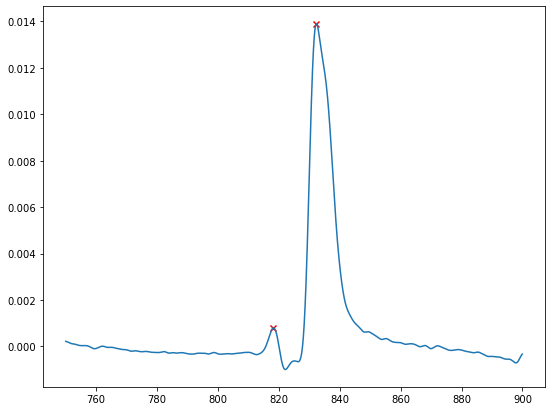

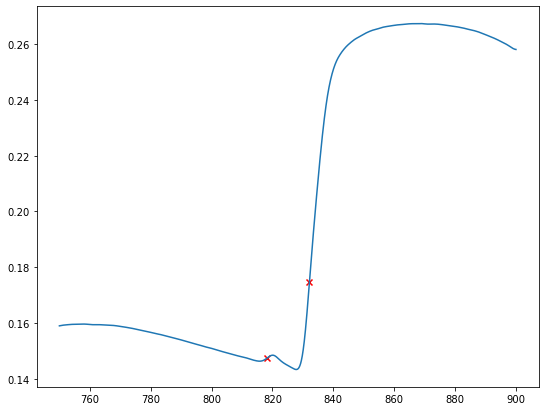

In [9]:
plt.figure(figsize=(9,7))
plt.scatter(peak_wl,[sci.filtfilt(b, a, diff_y)[i] for i in peak_indices],color='r', marker='x')
plt.plot(R['Wavelength'][:-1], sci.filtfilt(b, a, diff_y))

plt.figure(figsize=(9,7))
plt.scatter(peak_wl,[sci.filtfilt(b, a, R['Voltage'])[i] for i in peak_indices],color='r', marker='x')
plt.plot(R['Wavelength'], sci.filtfilt(b, a, R['Voltage']))

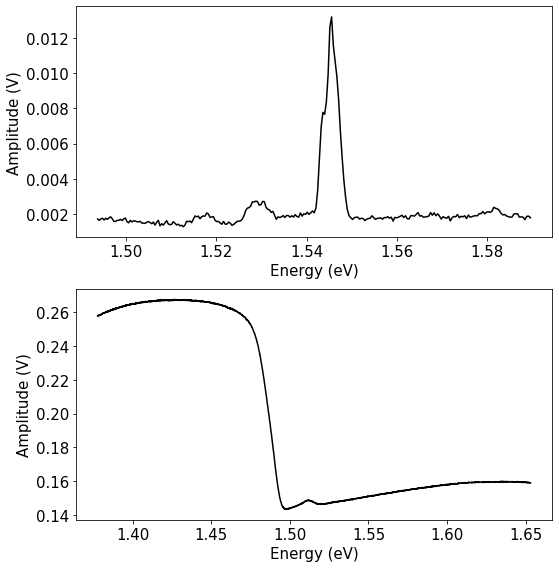

In [10]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(8,8))


ax0.plot(PL['Energy'], PL['Voltage'], color='k')
ax0.set_xlabel('Energy (eV)', size=15)
ax0.set_ylabel('Amplitude (V)', size=15)

ax0.tick_params(labelsize=15)


ax1.plot(R['Energy'], R['Voltage'], color='k')
ax1.set_xlabel('Energy (eV)', size=15)
ax1.set_ylabel('Amplitude (V)', size=15)

ax1.tick_params(labelsize=15)


fig.tight_layout()

plt.show()